In [115]:
import pandas as pd
from  sympy import *
import math 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.optimize

In [116]:
import scipy.io as sio
training = sio.loadmat('ex3data1.mat')
# Consider  the minimize function from the scipy library. 
# Hessian matrixquciker than gradient descent.

In [117]:
X = training['X']
y = training['y']
z = X[1500]

for i in range(len(y)):
    if y[i] == 10:
        y[i] = 0

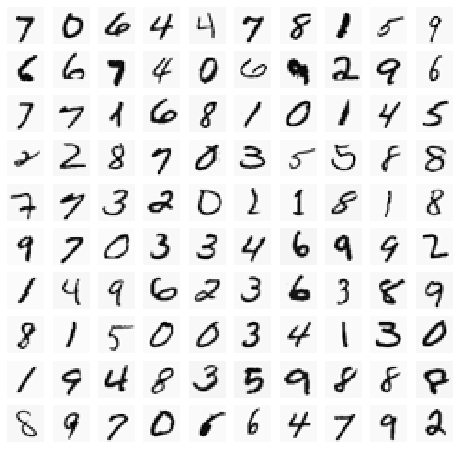

In [118]:
import matplotlib.image as mpimg
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"), cmap="Greys") #reshape back to 20 pixel by 20 pixel
        axis[i,j].axis("off")

In [119]:
print(X.shape)

(5000, 400)


In [121]:
z = z.reshape((20,20), order = "F")

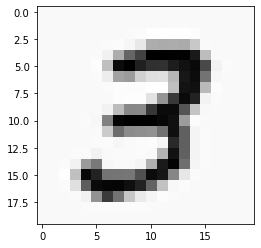

In [122]:
plt.imshow(z ,cmap = 'Greys',interpolation='none');

In [28]:
def change_array(array):
    
    new = np.zeros((5000,10))
   
    for j in range(0,10):
        
        for i in range(len(array)):
           
            if array[i][0] == j:
                new[i][j] = 1
                
            
            else:
                new[i][j] = 0
            
    return np.asarray(new)

In [29]:
y_new = change_array(y)

In [30]:
dataframe = pd.DataFrame.from_records(y_new)

In [31]:
dataframe[500:999]

,0,1,2,3,4,5,6,7,8,9
500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
994,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
y =  np.asarray(dataframe[dataframe.columns[0]])
y = y.reshape(5000,1)
#X = X.transpose()

In [33]:
def sigmoid(X, thetas, y ):
    
    product = np.matmul(X,thetas)

    return 1/(1+np.exp(-1*product)) - y

In [34]:
def objective(thetas,X,y): 
    
    new = sigmoid(X,thetas,y)
    sum_of_Bx  = np.matmul(X.T, new)
    
    return sum_of_Bx.sum()

In [35]:
def prediction(thetas, X , y):
    
    """
    
    Takes in the thetas vector and actual results to estimate precentage of predicitons.
    
    """
    
    product = np.matmul(X,thetas)
    
    return 1/(1+np.exp(-1*product))

In [74]:
#thetas = np.ones((len(features),1))
final_probs = []
for j in range(10):
    y =  np.asarray(dataframe[dataframe.columns[j]])
    y = y.reshape(5000,1)

    alpha = 0.1
    m = 5000
    thetas = np.ones((400,1))
    result = np.ones((400,1))

    iterations = 10000

    for i in range(iterations):

        new = sigmoid(X,thetas,y)

        bx  = np.matmul(X.T, new)

        thetas =  thetas - bx * alpha/m 

        #print(bx.sum())

        i+=1
    final_probs.append(prediction(thetas, X , y))


In [75]:
final_matrix = np.concatenate(final_probs, axis = 1)

In [95]:
y = training['y']

In [101]:
def find_accuracy(prediction_matrix,y):
    
    prediction_accuracy = []
    
    for i in range(len(y)): 
        if  prediction_matrix[i].argmax() == y[i]:
            prediction_accuracy.append(1)
        else:
            prediction_accuracy.append(0)
            
        
    return np.asarray(prediction_accuracy)

In [102]:
prediction = find_accuracy(final_matrix, y)

In [114]:
prediction.mean()
print("Prediction Accuracy = {accuracy:.1f} % ".format(accuracy = prediction.mean()*100))

Prediction Accuracy = 92.4 % 


In [43]:
testing = prediction(thetas, X , y)

In [44]:
testing

array([[9.98224511e-01],
       [9.93165406e-01],
       [8.36369738e-01],
       ...,
       [1.66928689e-06],
       [2.28422716e-07],
       [5.08139697e-03]])

0


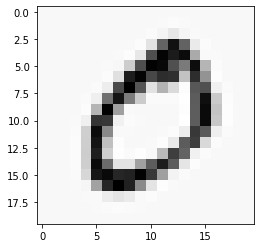

In [145]:
i = 0
print(final_matrix[i].argmax())
plt.imshow(X[i].reshape((20,20), order = "F") ,cmap = 'Greys', interpolation = 'None'); 


In [ ]:
print(bx.sum())

In [ ]:
#thetas = np.ones((len(features),1))
alpha = 0.1
m = 5000
thetas = np.ones((400,1))
result = np.ones((400,1))

i = 0

while i < 100:
    
    new = sigmoid(X,thetas,y)
    new = new.transpose()
   
    for j in range(400):                  

        result[j] = thetas[j] - np.sum(np.multiply(new,X.T[j])) * alpha/m 
           
    thetas = result    
    
    i+=1
    


In [ ]:
thetas0 = np.ones((400,1))


thetas = minimize(objective, thetas0, args = (X,y),  method='nelder-mead', options = {'maxiter' : 1})
